In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
#Funciones
def f(time, r, A, B):
    V = r[0]
    X = r[1]
    return np.array([- B*V - A*X, V])

In [33]:
#Constantes nominales del problema
m = 1.02
k = 40.0
omega = np.sqrt(k/m)
T = (2*np.pi)/omega
tf = 4.0 * T #tiempo final de simulación medida en segundos
initial_conditions = [3, 0.2] #[velocidad inicial, desplazamiento inicial]

#Constantes de amortiguamiento 
c1 = 25.54 #No amortiguado
c2 = 12.77 # c << c_critico
c3 = 2.55 # c < c_critico

C = [c1, c2, c3]

#Constantes de la EDG
A = k / m
B = []

for c in C:
    B.append(c/m)

#Resolvemos numéricamente las EDG
x1 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[0]], method='RK45', rtol=1e-8)
x2 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[1]], method='RK45', rtol=1e-8)
x3 = solve_ivp(f, (0, tf), initial_conditions, args=[A, B[2]], method='RK45', rtol=1e-8)


## Desplazamiento

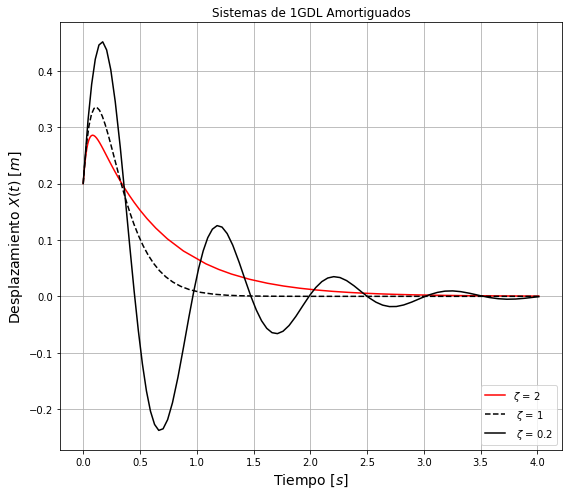

In [41]:
#Graficamos
fig, ax = plt.subplots(figsize=(8, 7), tight_layout=True)

#Modelos
ax.plot(x1.t, x1.y[1], 'r') 
ax.plot(x2.t, x2.y[1], 'k', linestyle='dashed') 
ax.plot(x3.t, x3.y[1], 'k') 

ax.grid(True)
ax.set_title("Sistemas de 1GDL Amortiguados")
ax.set_ylabel(r"Desplazamiento $X(t)$ $[m]$", fontsize=14)
ax.set_xlabel(r"Tiempo $[s]$", fontsize=14)
ax.legend([r'$\zeta$ = 2', r' $\zeta$ = $1$', r' $\zeta$ = $0.2$'], loc='lower right')
plt.show()

## Velocidades

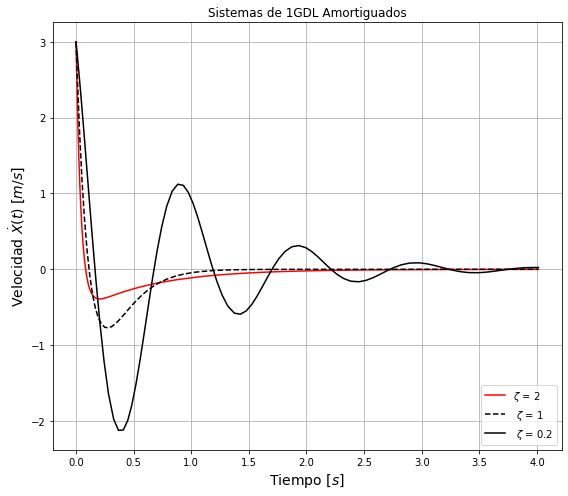

In [42]:
fig2, ax2 = plt.subplots(figsize=(8, 7), tight_layout=True)

#Modelos
ax2.plot(x1.t, x1.y[0], 'r') 
ax2.plot(x2.t, x2.y[0], 'k', linestyle='dashed')
ax2.plot(x3.t, x3.y[0], 'k') 

ax2.grid(True)
ax2.set_title("Sistemas de 1GDL Amortiguados")
ax2.set_ylabel(r"Velocidad $\dot{X}(t)$ $[m/s]$", fontsize=14)
ax2.set_xlabel(r"Tiempo $[s]$", fontsize=14)
ax2.legend([r'$\zeta$ = 2', r' $\zeta$ = $1$', r' $\zeta$ = $0.2$'], loc='lower right')
plt.show()

## Aceleraciones

In [36]:
acc1_t = []
acc2_t = []
acc3_t = []

for x in x1.t:
    if x == x1.t[-1]:
        pass
    else:
        acc1_t.append(x)

for x in x2.t:
    if x == x2.t[-1]:
        pass
    else:
        acc2_t.append(x)
        
for x in x3.t:
    if x == x3.t[-1]:
        pass
    else:
        acc3_t.append(x)
    

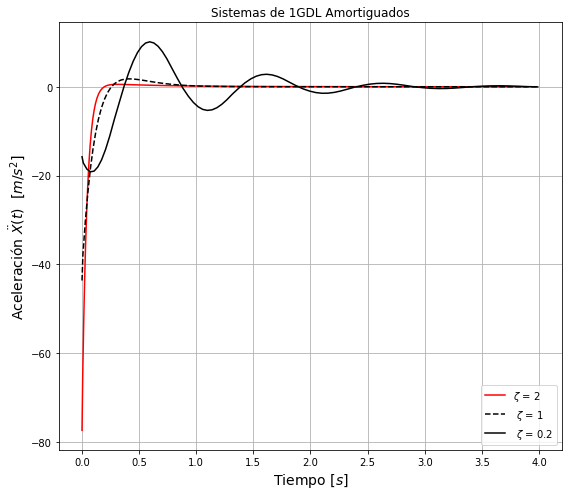

In [43]:

acc1 = np.diff(x1.y[0]) / np.diff(x1.t)
acc2 = np.diff(x2.y[0]) / np.diff(x2.t)
acc3 = np.diff(x3.y[0]) / np.diff(x3.t)


fig3, ax3 = plt.subplots(figsize=(8, 7), tight_layout=True)

#Modelos
ax3.plot(acc1_t, acc1, 'r')
ax3.plot(acc2_t, acc2, 'k', linestyle='dashed')
ax3.plot(acc3_t, acc3, 'k')

ax3.grid(True)
ax3.set_title("Sistemas de 1GDL Amortiguados")
ax3.set_ylabel(r"Aceleración $\ddot{X}(t)$  $[m/s^2]$", fontsize=14)
ax3.set_xlabel(r"Tiempo $[s]$", fontsize=14)
ax3.legend([r'$\zeta$ = 2', r' $\zeta$ = $1$', r' $\zeta$ = $0.2$'], loc='lower right')
plt.show()